In [1]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the companies data
companies=pd.read_csv("companies.csv",encoding="ISO-8859-1")


In [3]:
#load the rounds2 data
rounds2=pd.read_csv("rounds2.csv",encoding="ISO-8859-1")

In [4]:
# companies data overview
#companies.head()
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
# rounds2 data overview
rounds2.info()
#rounds2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
## Checkpoint 1: Data Cleaning 1
### As per excel sheet- I removed the duplicates and converted the values to lower case for rounds2 table 
### and got a total of 66368 rows same as companies table.

In [7]:
rounds2.company_permalink=rounds2.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')

In [8]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [9]:
# Unique companies in rounds2

def chklower(comp_val):
    return comp_val.lower()
rounds2["company_permalink"]=rounds2["company_permalink"].apply(chklower)
rounds2.company_permalink.nunique()

66368

In [10]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [11]:
companies.permalink=companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')

In [12]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [13]:
## Unique companies in companies df

companies.permalink.nunique()


66368

In [14]:
companies.shape
rounds2.shape

(114949, 6)

In [15]:
rounds2.company_permalink=rounds2.company_permalink.str.replace(' ','')
companies.permalink=companies.permalink.str.replace(' ','')


In [16]:
companies.info()
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2  

In [17]:
rnd2comp=pd.DataFrame(rounds2.company_permalink.unique())
comp=pd.DataFrame(companies.permalink.unique())
comp.equals(rnd2comp)

False

In [18]:
###Both the below codes gave the result.
#master_frame=pd.merge(rounds2,companies,how='left',left_on='company_permalink',right_on='permalink')
master_frame=rounds2.join(companies)

In [19]:
len(master_frame.index)

114949

In [20]:
companies.info()
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2  

In [21]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [22]:
master_frame.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [23]:
## Checkpoint 2: Funding Type Analysis
## Filtering the master_frame data with the below four funding type.

In [24]:
master_frame=master_frame[master_frame.funding_round_type.isin(['venture','seed','angel','private_equity'])]

In [25]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [26]:
master_frame.funding_round_type.value_counts()

venture           55494
seed              30524
angel              6094
private_equity     2285
Name: funding_round_type, dtype: int64

In [27]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         63277
funded_at                      0
raised_amount_usd          13770
permalink                  39988
name                       39989
homepage_url               44118
category_list              42600
status                     39988
country_code               45710
state_code                 47002
region                     46580
city                       46579
founded_at                 52424
dtype: int64

In [28]:
##As the above data shows we have a quite significant number of null values in raised_amount_usd column. Let's clean it.

In [29]:
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull())]

In [30]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [31]:
##Now we have removed the null values from the raised_amount_usd column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         52474
funded_at                      0
raised_amount_usd              0
permalink                  34049
name                       34050
homepage_url               37566
category_list              36262
status                     34049
country_code               38929
state_code                 40038
region                     39675
city                       39674
founded_at                 44738
dtype: int64

In [32]:
## Now we need to find out the average funding amount for each of the above funding types.

In [33]:
## Tried using a comprehension technique but didn't work.
#[(master_frame['raised_amount_usd'].mean() for i in master_frame['funding_round_type'] if master_frame['funding_round_type']=='venture')]

In [34]:
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(),2)

funding_round_type
angel               958694.47
private_equity    73308593.03
seed                719818.00
venture           11748949.13
Name: raised_amount_usd, dtype: float64

In [35]:
## Checkpoint 6: Plots-- the representative amount of investment in each funding type

In [36]:
## As per the sparks fund requirement, the best fund to invest in should have foloowing two criterias:
## 1- Maximum number of investements
## 2- Investment between 5 million and 15 million USD

### Conclusion- Only Venture funding satisfies above two criterias.

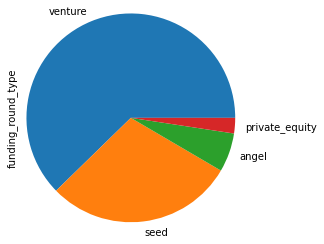

In [37]:
master_frame['funding_round_type'].value_counts().plot.pie(radius=1.2)
plt.show()

In [38]:
#As per the above data it can be concluded that venture type funding is the most suitable one for sparks funds.
# The value of the venture funding is 11748949 which lies between 5 and 15 million USD.

In [39]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11-09-2009,43360.0,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011


In [40]:
master_frame=master_frame[master_frame.funding_round_type == 'venture']

In [41]:
master_frame.funding_round_type.value_counts()

venture    50228
Name: funding_round_type, dtype: int64

In [42]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/1-4-All,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN


In [43]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         22185
funded_at                      0
raised_amount_usd              0
permalink                  20951
name                       20951
homepage_url               23183
category_list              22347
status                     20951
country_code               24082
state_code                 24746
region                     24535
city                       24534
founded_at                 27673
dtype: int64

In [44]:
## Checkpoint 3: Country Analysis
## Creating a pivot table to show the countries with their respective investment amount.

In [45]:
top9=master_frame.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum')


In [46]:
top9.head()

,raised_amount_usd
country_code,
ALB,5.821153e+06
ARE,3.493654e+08
ARG,2.027550e+09
AUS,2.414416e+09
AUT,1.173570e+09


In [47]:
## Now we need to sort the values to get the top9 countries based on the investement amount.

In [48]:
top9=top9.sort_values(by ='raised_amount_usd',ascending=False)

In [49]:
top9=top9.iloc[:9,]

In [50]:
top9

,raised_amount_usd
country_code,
USA,2.073456e+11
GBR,1.842098e+10
CAN,9.078461e+09
CHN,8.189876e+09
IND,8.079915e+09
DEU,5.732918e+09
FRA,5.144622e+09
ISR,3.996601e+09
ESP,3.333066e+09


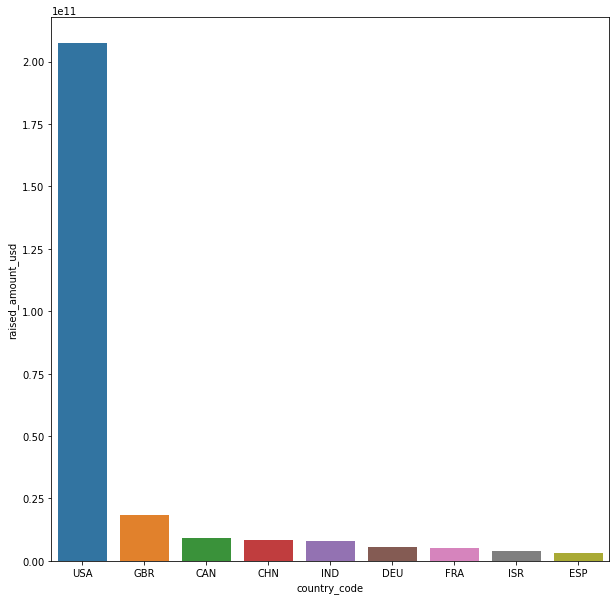

In [51]:
##Checkpoint 6: Plots-- 2nd plot
plt.figure(figsize=(10,10))
sns.barplot(x=top9.index,y="raised_amount_usd",data=top9)
plt.show()

In [52]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/1-4-All,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN


In [53]:
## Now filtering data with the top 3 countries- USA, GBR, CAN (where official language is english)

In [54]:
master_frame=master_frame[(master_frame['country_code']=='USA')|(master_frame['country_code']=='GBR')|(master_frame['country_code']=='CAN')]

In [55]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/1-4-All,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/1-618-Technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/1-800-Dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986


In [56]:
master_frame.country_code.value_counts()

USA    16580
GBR     1659
CAN      836
Name: country_code, dtype: int64

In [57]:
## Removing any NaN value from category list column.

In [58]:
master_frame.dropna(subset=["category_list"],inplace=True)

In [59]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/1-4-All,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/1-618-Technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/1-800-Dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986


In [60]:
master_frame.category_list.isnull().sum()

0

In [61]:
master_frame.category_list.head(20)

4                                               Software
8                                                 Mobile
10                          Entertainment|Games|Software
11                    Networking|Real Estate|Web Hosting
12                                   Health and Wellness
34                                           Curated Web
38                          Batteries|Electronics|Energy
41                                         Biotechnology
44                                   Health and Wellness
47                                   Enterprise Software
50                                                Sports
59                                              Software
74                                               Fashion
80                                              Software
81                                              Internet
95                         Health Care|Insurance|Medical
99     Cosmetics|E-Commerce|Fashion|Lifestyle|Persona...
103                    Health a

In [62]:
## Checkpoint 4: Sector Analysis 1
## We need to fetch first part of the category list values in the master_frame
## In the mapping table the data is present in the form of a pivot table which has 0 and 1 as its values. 
## We need to unpivot the table so that we can put the categories into its respective sector bucket. 
## To do this we will use melt function which is basically used to reshape a pivot table.

In [63]:
## I first tried to use the split function directly like .str.split. 
## This will separate the text but not able to extract the first value and apply to the column. 
## So better to use apply method and use [0] to extract the first value.
## Initially i got 'float' object has no attribute 'split' error- this was because of NaN value. Once removed it worked fine.
master_frame['primary_sector']= master_frame.category_list.apply(lambda x:x.split('|')[0])


In [64]:
master_frame.head(30)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,Mobile
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,/Organization/1-4-All,1-4 All,NaN,Entertainment|Games|Software,operating,USA,NC,NC - Other,Connellys Springs,NaN,Entertainment
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,/Organization/1-618-Technology,1.618 Technology,http://www.Homeandcondogallery.com,Networking|Real Estate|Web Hosting,operating,USA,FL,Orlando,Orlando,07-12-2013,Networking
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/1-800-Dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986,Health and Wellness
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/Organization/10Bestthings,10BestThings,http://10bestthings.com,Curated Web,closed,USA,OH,Cleveland,Cleveland,01-04-2009,Curated Web
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,venture,NaN,14-10-2009,265940.0,/Organization/10Six,10Six,http://10sixenergy.com,Batteries|Electronics|Energy,operating,USA,NY,New York City,New York,NaN,Batteries
41,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,01-08-2014,1500000.0,/Organization/10X-Technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,operating,USA,CA,SF Bay Area,Oakland,01-01-2012,Biotechnology
44,/organization/1000museums-com,/funding-round/fd1b3064232ba9b3cfb5653a619e82e8,venture,NaN,05-04-2011,642000.0,/Organization/11-Health,11 Health,http://www.11health.com,Health and Wellness,operating,GBR,H9,London,London,NaN,Health and Wellness
47,/organization/1001-menus,/funding-round/8025123b90c1ab687f9857ffe18bfd3b,venture,A,13-11-2013,1736910.0,/Organization/11I-Solutions,11i Solutions,http://www.11isolutions.com,Enterprise Software,closed,USA,AL,Huntsville,Huntsville,NaN,Enterprise Software


In [65]:
mapping=pd.read_csv("mapping.csv")

In [66]:
mapping.dropna(subset=["category_list"],inplace=True)

In [67]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [68]:
## There are few glitches in the category list column like instead of Na it is 0 which does not make any sense.
## E.g. 0notechnology instead it should be Nanotechnology. So we will replace the 0 with na and not with Na(in many cases it is a part of a word).

In [69]:
mapping.category_list=mapping.category_list.replace({'0':'na'})

In [70]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [71]:

mapping=pd.melt(mapping,id_vars=['category_list'],value_vars=['Automotive & Sports','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'])

In [72]:
mapping.isnull().sum()

category_list    0
variable         0
value            0
dtype: int64

In [73]:
## Now we need to remove the above value column (axis=1)as it is of no use to us. Rename the variable column to primary_sector
mapping=mapping[~(mapping.value==0)]
mapping=mapping.drop('value',axis=1)
mapping=mapping.rename(columns={"variable":"main_sector"})
mapping.head(50)


,category_list,main_sector
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports
56,Bicycles,Automotive & Sports
68,Boating Industry,Automotive & Sports
86,CAD,Automotive & Sports
92,Cars,Automotive & Sports
187,Design,Automotive & Sports


In [74]:
## Now we need to merge this table with our master_frame with the help of category list as it is the common field between the two
master_frame=master_frame.merge(mapping,how='left',on='category_list')

In [75]:
master_frame.dropna(subset=["main_sector"],inplace=True)

In [76]:
master_frame.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Others
1,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011,Mobile,"News, Search and Messaging"
4,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,/Organization/1-800-Dentist,1-800-DENTIST,http://www.1800dentist.com,Health and Wellness,operating,USA,CA,Los Angeles,Los Angeles,01-01-1986,Health and Wellness,Health
5,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/Organization/10Bestthings,10BestThings,http://10bestthings.com,Curated Web,closed,USA,OH,Cleveland,Cleveland,01-04-2009,Curated Web,"News, Search and Messaging"
7,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,venture,NaN,01-08-2014,1500000.0,/Organization/10X-Technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,operating,USA,CA,SF Bay Area,Oakland,01-01-2012,Biotechnology,Cleantech / Semiconductors


In [77]:
master_frame.raised_amount_usd.count()

8859

In [78]:
## It seems we have lot of unnecessary columns which we are not going to use till the end. So lets drop them.

In [79]:
master_frame=master_frame.drop(['funding_round_permalink','funding_round_code','funded_at','name','homepage_url','status','state_code','region','city','founded_at'],axis=1)

In [80]:
## Checkpoint 5: Sector Analysis 2
## We need to create three dataframes D1, D2, D3 for each of the three coutries.

In [81]:
D1=master_frame[(master_frame['country_code']=='USA') & (master_frame['raised_amount_usd']>=5000000)& (master_frame['raised_amount_usd']<=15000000)]
D2=master_frame[(master_frame['country_code']=='GBR') & (master_frame['raised_amount_usd']>=5000000)& (master_frame['raised_amount_usd']<=15000000)]
D3=master_frame[(master_frame['country_code']=='CAN') & (master_frame['raised_amount_usd']>=5000000)& (master_frame['raised_amount_usd']<=15000000)]

In [82]:
D1.main_sector.value_counts()

Others                                     847
Cleantech / Semiconductors                 589
Health                                     274
News, Search and Messaging                 239
Manufacturing                              205
Social, Finance, Analytics, Advertising    200
Entertainment                              142
Automotive & Sports                         51
Name: main_sector, dtype: int64

In [83]:
D1.raised_amount_usd.count()

2547

In [84]:
D2.raised_amount_usd.count()

221

In [85]:
D3.raised_amount_usd.count()

128

In [86]:
round(D1.raised_amount_usd.sum(),2)

22549641468.0

In [87]:
round(D2.raised_amount_usd.sum(),2)

1888393104.0

In [88]:
round(D3.raised_amount_usd.sum(),2)

1106992710.0

In [89]:
D1_GROUPED=D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])

In [90]:
D1_GROUPED

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                          4.503023e+08    51
Cleantech / Semiconductors                   5.185770e+09   589
Entertainment                                1.206627e+09   142
Health                                       2.462059e+09   274
Manufacturing                                1.853223e+09   205
News, Search and Messaging                   2.162130e+09   239
Others                                       7.467630e+09   847
Social, Finance, Analytics, Advertising      1.761901e+09   200

In [91]:
D2_GROUPED=D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])

In [92]:
D2_GROUPED

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                             5000000.0     1
Cleantech / Semiconductors                    408869377.0    45
Entertainment                                 210667471.0    24
Health                                         49500000.0     7
Manufacturing                                 186215220.0    21
News, Search and Messaging                    233500654.0    27
Others                                        630894327.0    77
Social, Finance, Analytics, Advertising       163746055.0    19

In [93]:
D3_GROUPED=D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum','count'])

In [94]:
D3_GROUPED

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                            64242832.0     6
Cleantech / Semiconductors                    333817790.0    40
Entertainment                                  97426152.0    11
Health                                         43468800.0     5
Manufacturing                                  77224472.0    11
News, Search and Messaging                     35000000.0     4
Others                                        342312664.0    38
Social, Finance, Analytics, Advertising       113500000.0    13

In [95]:
## I used the same name as D1 so could not perform the opration on the basis of second main_sector.
## So we should mention a different name so that we the D1 data is at its place.
##D1=D1[D1['main_sector']=='Others']
D1_comp=D1[D1['main_sector']=='Others']
D1_comp

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,primary_sector,main_sector
61,/organization/2nd-watch,venture,10000000.0,/Organization/3Ten8,Software,USA,Software,Others
64,/organization/2u,venture,5100000.0,/Organization/4-Tell,E-Commerce,USA,E-Commerce,Others
165,/organization/56-com,venture,10000000.0,/Organization/Abo-Data,Enterprise Software,USA,Enterprise Software,Others
177,/organization/6fusion,venture,10918865.0,/Organization/Acacia-Interactive,Software,USA,Software,Others
191,/organization/700bike,venture,15000000.0,/Organization/Accelerated-Io,Software,USA,Software,Others
...,...,...,...,...,...,...,...,...
18504,/organization/nautilus-biotech,venture,11300000.0,/Organization/Zmanda,Software,USA,Software,Others
18513,/organization/navetas-energy-management,venture,5790000.0,/Organization/Zolpy,E-Commerce,USA,E-Commerce,Others
18549,/organization/ncrowd-inc,venture,7000000.0,/Organization/Zudy,Software,USA,Software,Others
18564,/organization/nearbynow,venture,11750000.0,/Organization/Zuse,Software,USA,Software,Others


In [96]:
D1_comp=D1_comp.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
##Now sort the pivot table to get the top company
D1_comp=D1_comp.sort_values(by='raised_amount_usd',ascending=False)
D1_comp.head()

,raised_amount_usd
company_permalink,
/organization/illumitex,32800000.0
/organization/ioxus,27000000.0
/organization/bridgewave,25100000.0
/organization/logrhythm,25000000.0
/organization/glysure,24412621.0


In [97]:
D1_comp=D1[D1['main_sector']=='Cleantech / Semiconductors']
D1_comp

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,primary_sector,main_sector
25,/organization/17zuoye,venture,5000000.0,/Organization/22Nd-Century-Group,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
71,/organization/3-v-biosciences,venture,14278567.0,/Organization/480-Biomedical,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
76,/organization/3-v-biosciences,venture,7610000.0,/Organization/4Cable-Tv,Clean Technology,USA,Clean Technology,Cleantech / Semiconductors
132,/organization/480-biomedical,venture,10500000.0,/Organization/A-G-Pharmaceutical,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
142,/organization/4s91-com,venture,10000000.0,/Organization/Aarden-Pharmaceuticals,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
...,...,...,...,...,...,...,...,...
18430,/organization/nanotech-semiconductor,venture,5000000.0,/Organization/Zepteon,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors
18471,/organization/nasty-gal,venture,9000000.0,/Organization/Zilker-Labs,Semiconductors,USA,Semiconductors,Cleantech / Semiconductors
18482,/organization/natera,venture,12000000.0,/Organization/Zinc-Air,Clean Technology,USA,Clean Technology,Cleantech / Semiconductors
18537,/organization/nbo-tv-network,venture,8000000.0,/Organization/Zosano-Pharma,Biotechnology,USA,Biotechnology,Cleantech / Semiconductors


In [98]:
D1_comp=D1_comp.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
##Now sort the pivot table to get the top company
D1_comp=D1_comp.sort_values(by='raised_amount_usd',ascending=False)
D1_comp.head()

,raised_amount_usd
company_permalink,
/organization/arsenal-medical-inc,23151308.0
/organization/coulomb-technologies,22743598.0
/organization/kitcheck,22370400.0
/organization/acco-semiconductor,22188066.0
/organization/chromatin,22000000.0


In [99]:
D2_comp=D2[D2['main_sector']=='Cleantech / Semiconductors']
D2_comp

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,primary_sector,main_sector
179,/organization/6fusion,venture,7000000.0,/Organization/Acacia-Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
185,/organization/6th-sense-analytics,venture,5000000.0,/Organization/Acal-Energy,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors
1107,/organization/agnitio,venture,6890000.0,/Organization/Apitope,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
1255,/organization/akarx,venture,8050000.0,/Organization/Aquamarine-Power,Clean Technology,GBR,Clean Technology,Cleantech / Semiconductors
1298,/organization/akustica,venture,10000000.0,/Organization/Archimedes-Pharma,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
1967,/organization/apalya,venture,8000000.0,/Organization/Bedi-Oralcare,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
3248,/organization/bandsintown-group,venture,10000000.0,/Organization/Cellcap-Technologies,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
3249,/organization/bandspeed,venture,8000000.0,/Organization/Cellcentric,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
3269,/organization/baobab-studios,venture,6000000.0,/Organization/Celtic-Renewables,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors
3358,/organization/bbn-technologies,venture,10500000.0,/Organization/Chargepoint-Technology,Biotechnology,GBR,Biotechnology,Cleantech / Semiconductors


In [100]:
D2_comp=D2_comp.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
##Now sort the pivot table to get the top company
D2_comp=D2_comp.sort_values(by='raised_amount_usd',ascending=False)
D2_comp.head()

,raised_amount_usd
company_permalink,
/organization/cenzic,15000000.0
/organization/meraki,15000000.0
/organization/liquid-light,15000000.0
/organization/eos-energy-storgae,15000000.0
/organization/drobo,15000000.0


In [101]:
D3_comp=D3[D3['main_sector']=='Others']
D3_comp

,company_permalink,funding_round_type,raised_amount_usd,permalink,category_list,country_code,primary_sector,main_sector
1038,/organization/agari-data,venture,15000000.0,/Organization/Anomalous-Networks,Software,CAN,Software,Others
1358,/organization/alegro-health,venture,6171709.0,/Organization/Arisoko,E-Commerce,CAN,E-Commerce,Others
1592,/organization/altierre,venture,13000000.0,/Organization/Au-Carrefour,E-Commerce,CAN,E-Commerce,Others
2768,/organization/august,venture,8000000.0,/Organization/Buildcircle,Enterprise Software,CAN,Enterprise Software,Others
3616,/organization/beyond-oblivion,venture,10000000.0,/Organization/Clevru,Education,CAN,Education,Others
4869,/organization/c3,venture,9999998.0,/Organization/Dobundle,E-Commerce,CAN,E-Commerce,Others
5266,/organization/caribbean-telecom-partners,venture,6150000.0,/Organization/Educreducorp,Education,CAN,Education,Others
5357,/organization/caspida,venture,9524995.0,/Organization/Elliptic-Technologies,Security,CAN,Security,Others
5903,/organization/chipidea-microelectrnica,venture,5900000.0,/Organization/Exfo,Web Hosting,CAN,Web Hosting,Others
5911,/organization/chloe-isabel,venture,15000000.0,/Organization/Exludus-Technologies,Software,CAN,Software,Others


In [102]:
D3_comp=D3_comp.pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum')
##Now sort the pivot table to get the top company
D2_comp=D2_comp.sort_values(by='raised_amount_usd',ascending=False)
D2_comp.head()

,raised_amount_usd
company_permalink,
/organization/cenzic,15000000.0
/organization/meraki,15000000.0
/organization/liquid-light,15000000.0
/organization/eos-energy-storgae,15000000.0
/organization/drobo,15000000.0


In [103]:
## Checkpoint 6: Plot-3

In [104]:
  D1_GROUPED 

raised_amount_usd      
                                                      sum count
main_sector                                                    
Automotive & Sports                          4.503023e+08    51
Cleantech / Semiconductors                   5.185770e+09   589
Entertainment                                1.206627e+09   142
Health                                       2.462059e+09   274
Manufacturing                                1.853223e+09   205
News, Search and Messaging                   2.162130e+09   239
Others                                       7.467630e+09   847
Social, Finance, Analytics, Advertising      1.761901e+09   200

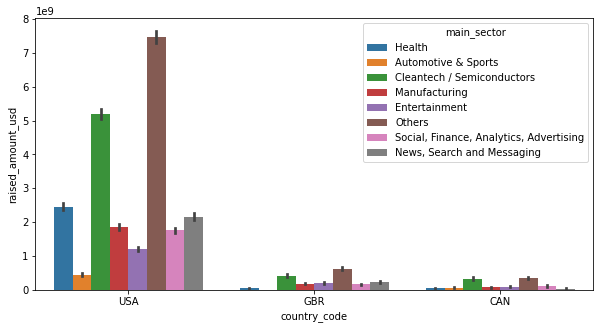

In [105]:
top_3_countries=pd.concat([D1,D2,D3])
plt.figure(figsize=(10,5))
sns.barplot(x='country_code',y='raised_amount_usd',hue='main_sector',data=top_3_countries,estimator=np.sum)
plt.show()